In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from PIL import Image, ImageFont, ImageDraw, ImageFilter
import cv2

In [85]:
BG_PATH = './backgrounds/'
CARAC_PATH = './caracters/'


img = cv2.imread(BG_PATH + '4.png')
overlay_t = cv2.imread(CARAC_PATH+ 'letter_4.png',-1) # -1 loads with transparency

In [89]:
print(overlay_t.shape)
def overlay_caracter(background_img, caracter_t, x, y, overlay_size=None):
    """
    @brief      Overlays a transparant PNG onto another image using CV2

    @param      background_img    The background image
    @param      caracter_t  The transparent image to overlay (has alpha channel)
    @param      x                 x location to place the top-left corner of our overlay
    @param      y                 y location to place the top-left corner of our overlay
    @param      overlay_size      The size to scale our overlay to (tuple), no scaling if None

    @return     Background image with overlay on top
    """
    
    bg_img = background_img.copy()

    if overlay_size is not None:
        caracter_t = cv2.resize(caracter_t.copy(), overlay_size)

    # Extract the alpha mask of the RGBA image, convert to RGB 
    #print(caracter_t.shape)
    b,g,r,a = cv2.split(caracter_t)
    overlay_color = cv2.merge((b,g,r))

    # Apply some simple filtering to remove edge noise
    mask = cv2.medianBlur(a,5)

    h, w, _ = overlay_color.shape
    roi = bg_img[y:y+h, x:x+w]

    # Black-out the area behind the logo in our original ROI
    img1_bg = cv2.bitwise_and(roi.copy(),roi.copy(),mask = cv2.bitwise_not(mask))

    # Mask out the logo from the logo image.
    img2_fg = cv2.bitwise_and(overlay_color,overlay_color,mask = mask)

    # Update the original image with our new ROI
    bg_img[y:y+h, x:x+w] = cv2.add(img1_bg, img2_fg)

    return bg_img

#plt.imshow(overlay_caracter(img, overlay_t, 400, 800))
#plt.show()
#print(type(img))

(255, 150, 4)


In [176]:

def generate_letter(letter, angle=0):
    """ Generate a textured letter
    """
    img = Image.new("RGB", (140, 180), "black")
    # get a font
    # get a drawing context
    d = ImageDraw.Draw(img)

    # Select the right font for the right letters
    if letter == "3":
        fnt = ImageFont.truetype('./fonts/AVHersheySimplexMedium.otf', 218)
        # draw text, full opacity
        d.text((3, 10), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((7, 7), np.uint8)
    elif letter == "1":
        fnt = ImageFont.truetype('./fonts/Calibri.ttf', 200)
        # draw text, full opacity
        d.text((8, -30), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((10, 10), np.uint8)
    elif letter == "W":
        fnt = ImageFont.truetype('./fonts/Goodlight-Light.otf', 110)
        # draw text, full opacity
        d.text((2, 40), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((3, 3), np.uint8)
    elif letter == "I":
        fnt = ImageFont.truetype('./fonts/Tahoma.ttf', 180)
        # draw text, full opacity
        d.text((20, -15), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((9, 9), np.uint8)
    elif letter == "M":
        fnt = ImageFont.truetype('./fonts/Tahoma.ttf', 180)
        # draw text, full opacity
        d.text((0, -20), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((9, 9), np.uint8)
    elif letter in "02456789":
        fnt = ImageFont.truetype('./fonts/Arial.ttf', 180)
        # draw text, full opacity
        d.text((20, 0), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((9, 9), np.uint8) 
    elif letter == "/":
        fnt = ImageFont.truetype('./fonts/Arial.ttf', 180)
        # draw text, full opacity
        d.text((30, 0), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((9, 9), np.uint8) 
    else:
        fnt = ImageFont.truetype('./fonts/Arial.ttf', 180)
        # draw text, full opacity
        d.text((2, 0), letter, font=fnt, fill=(255, 255, 255, 255))
        kernel = np.ones((9, 9), np.uint8)

    # Rotate the image if needed
    if angle > 1:
        img = img.transpose(angle)

    # Blur and erode the letter so they are thinner
    img = np.array(img)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.erode(img, kernel, iterations = 1)
    img = Image.fromarray(img)

    # Make an emboss effect
    img = img.filter(ImageFilter.EMBOSS)

    # Rerotate the image if needed
    if angle > 1:
        img = img.transpose(6-angle)

    # Resize the image so the letter is narrow
    img = img.resize((100, 180))

    # Set the gray pixels are transparent
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 128 and item[1] == 128 and item[2] == 128:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)

    # Resize the image so the letter has the same size than on the chip
    img = img.resize((150, 266))

    # if letter == '/':
    #     img.save('eurosilicone_letters/letter_{}.png'.format('slash'), "PNG")
    # else:
    #     img.save('eurosilicone_letters/letter_{}.png'.format(letter), "PNG")

    # Crop borders
    img = img.crop((5, 20, 147, 260))
    #bbox = img.getbbox()
    #img = img.crop(bbox)

    # img = np.array(img)
    #
    # img = add_gaussian_noise(img, 25)
    #
    # cv2.imwrite("step4.png", img)
    #
    # img = img[20:img.shape[0]-1, 1:img.shape[1]-1]
    #
    # img = img.astype(int)
    plt.imshow(img)
    plt.show()
    #print(type(img))
    return img, img.size

llnnn
len_line 5
sart_offset 412
412 661


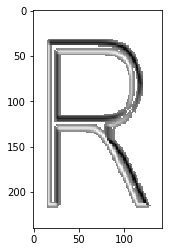

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
562 661


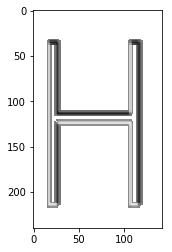

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
712 661


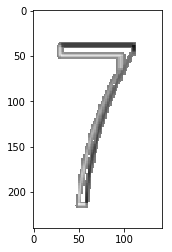

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
862 661


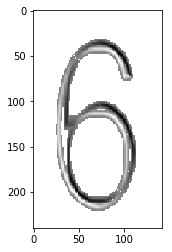

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
1012 661


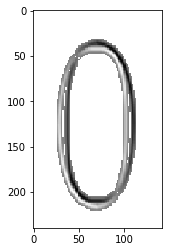

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
nn/nnncc
len_line 8
sart_offset 187
187 944


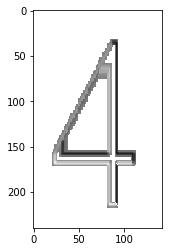

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
337 944


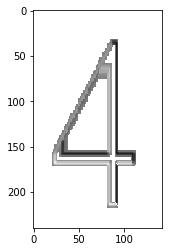

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
487 944


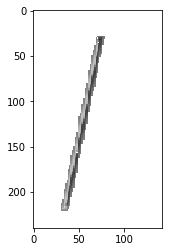

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
637 944


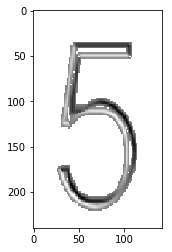

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
787 944


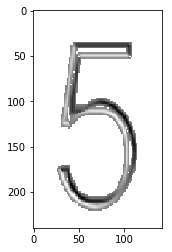

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
937 944


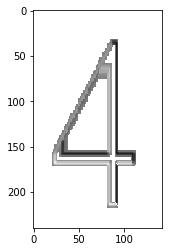

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
1087 944


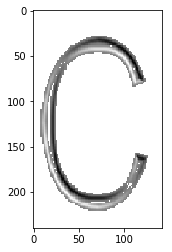

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
1237 944


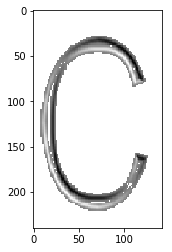

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
lnnnn
len_line 5
sart_offset 412
412 1180


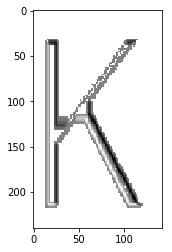

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
562 1180


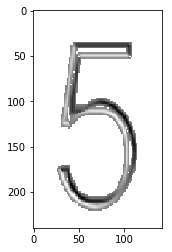

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
712 1180


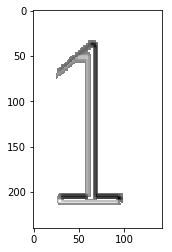

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
862 1180


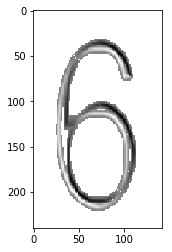

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
1012 1180


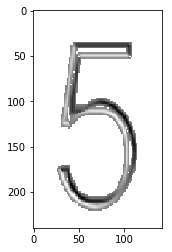

bla <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'>
[(412, 661), (562, 661), (712, 661), (862, 661), (1012, 661), (187, 944), (337, 944), (487, 944), (637, 944), (787, 944), (937, 944), (1087, 944), (1237, 944), (412, 1180), (562, 1180), (712, 1180), (862, 1180), (1012, 1180)]
['R', 'H', '7', '6', '0', '4', '4', '/', '5', '5', '4', 'C', 'C', 'K', '5', '1', '6', '5']


(<PIL.PngImagePlugin.PngImageFile image mode=LA size=1574x1574 at 0x7FCF58082B70>,
 [(412, 661),
  (562, 661),
  (712, 661),
  (862, 661),
  (1012, 661),
  (187, 944),
  (337, 944),
  (487, 944),
  (637, 944),
  (787, 944),
  (937, 944),
  (1087, 944),
  (1237, 944),
  (412, 1180),
  (562, 1180),
  (712, 1180),
  (862, 1180),
  (1012, 1180)],
 '5')

In [175]:
def print_text(dispo, im):
    
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    numbers = '0123456789'
    [width, height] = im.size   
    ratio_line = [0.42, 0.60, 0.75] 
    coords = []
    caracs = []
    
    
    for index, line in enumerate(dispo):
        
        len_line = len(line[0])
        print(line[0])
        
        width_carac = 150
        start_offset  = int(width/2 - (len_line*width_carac)/2)
        print('len_line',len_line)
        print('sart_offset',start_offset)
        y = int(ratio_line[index]*height)

        for index2, carac_type in enumerate(line[0]):
            
            if carac_type == 'l':
                carac = random.choice(letters)
            elif carac_type == 'n':
                carac = random.choice(numbers)
            elif carac_type == 'c':
                carac = 'C'    
            elif carac_type == '/':
                carac = '/'   
            else:
                print('Hmm, not valid caracter in disposition')
                      
            x = start_offset + width_carac * index2
            print(x,y)
            caracter_t, letters_size  = generate_letter(carac)
            print('bla', type(im))
            #im = Image.fromarray(im)
            print(type(caracter_t))
            
            coords.append((x,y))
            caracs.append(carac)
            
            im.paste(caracter_t, (x,y), caracter_t)
            
            #im = overlay_caracter(im, caracter_t, x, y, overlay_size=None)
                
        
    print(coords)
    print(caracs)
    
    return im, coords, carac, letters_size










def generate_chip():

    BG_PATH = './backgrounds/'
    bgs = os.listdir(BG_PATH)
    # Different dispositions on the chip for the different lines :  'n' : number
    #                                                               'c' : letter c
    #                                                               'l' : letter 
    dispositions = [['llnnn',],
                    ['nn/nnncc'],#'nnl/nnncc','nnl/nnncc','lln/nnncc',],
                    ['lnnnn',]]
    n = random.randint(0,3)
    
    #Randomly choose dispo
    dispo = dispositions
    #dispo[1] = [dispositions[1][n]]
    
    
    #Randomly choose background
    #bg = cv2.imread(BG_PATH + bgs[random.randint(0,6)])
    bg = Image.open(BG_PATH + bgs[random.randint(0,6)])

    chip, coords, caracs = print_text(dispo, bg)
    chip.save('./CHIP.png')
    #plt.imshow(chip)
    #plt.show()
    
    
    return chip, coords, caracs
    
    
generate_chip()

In [171]:
print(random.randint(0,2))
#print(dispositions[1])

1
